## 회귀

앞선 3장까지는 모델과 훈련 알고리즘을 블랙박스 취급.  
내부적으로 어떻게 작동하는지 몰라도 어느정도 일을 처리할 수 있고 실제로도 구현의 상세사항을 구체적으로 알 필요는 없다.

하지만 어떻게 작동하는지 잘 이해하고 있으면 *'적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼파리미터'* 를 빠르게 찾을 수 있다.

4장 **회귀** 파트는 뒤에서 배울 신경망을 이해하고 구축하고 훈련시키는데 필수적인 내용

### Index

1. 선형 회귀
2. 경사 하강법 
      - 배치 경사 하강법  
      - 확률적 경사 하강법  
      - 미니배치 경사 하강법  
3. 다항 회귀
4. 학습 곡선
5. 규제가 있는 선형 모델
      - 릿지 회귀  
      - 라쏘 회귀  
      - 엘라스틱 넷  
      - 조기 종료  
6. 로지스틱 회귀
      - 확률 추정  
      - 훈련과 비용 함수  
      - 결정 경계  
      - 소프트맥스 회귀  

### 4.1 선형회귀

#### 4.1.1 정규방정식

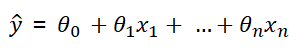

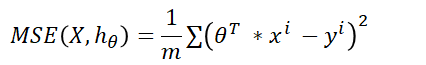

In [23]:
import numpy as np
X = 2 * np.random.rand(100, 1) #0 과 100사이에 무작위로 난수 추출후 X 2
y = 4 + 3 * X + np.random.randn(100, 1) # 4+ 3x + bias 형태 bias는 표준정규분포를 따르는 샘플 100

In [35]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

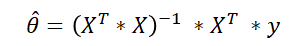

In [36]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.82817992],
       [10.03847811]])

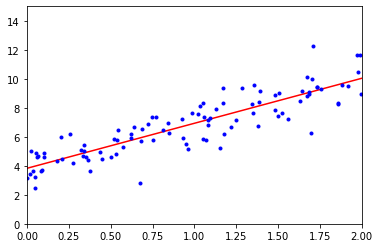

In [38]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

#### 4.1.2 계산 복잡도

정규방정식의 역행렬을 계산하는 계산 복잡도는 일반적으로 𝑂(𝑛^2.4 )과 𝑂(𝑛^3) 사이 즉, 특성 수가 두배로 늘어나면 계산시간이 5~8배 정도씩 지수적으로 증가

또한, 데이터 샘플 수에 대한 계산 복잡도는 선형적으로 증가

정리하면

**특성수가 너무 많은경우 계산 복잡도가 지수적으로 올라가 정규방정식으로 해결 불가**  
**특성수는 적은데 데이터가 많은경우 저장 메모리공간만 허락한다면 큰 데이터셋도 쉽게 처리 및 예측 가능**

### 4.2 경사 하강법

비용 함수 최소화를 위해 반복해서 파라미터를 조정해가는 것.

*gradient descent의 목표*

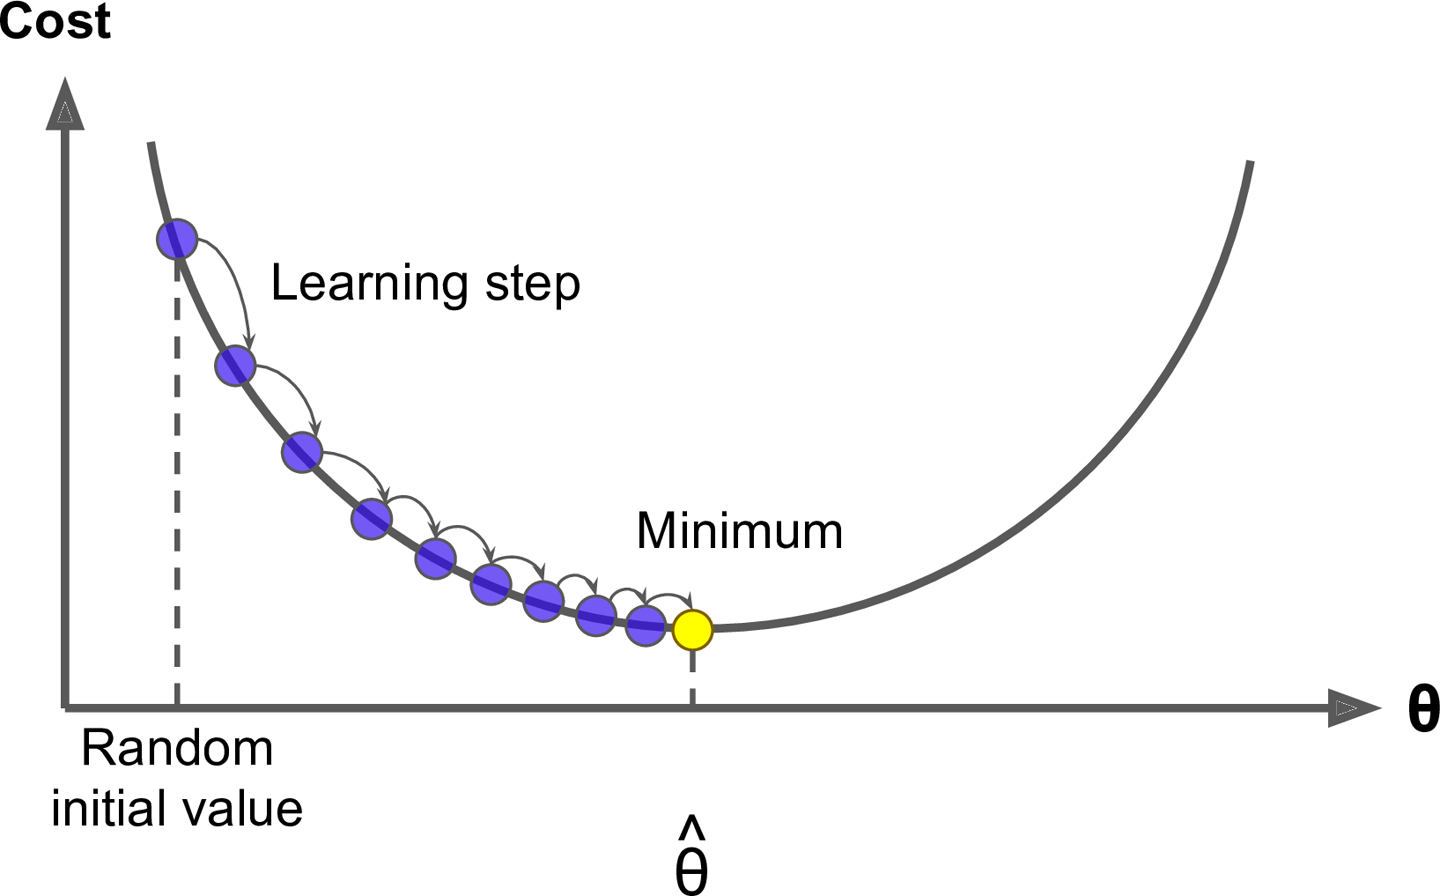

*학습률이 너무 적은 gradient descent*  
수렴속도가 너무느리다

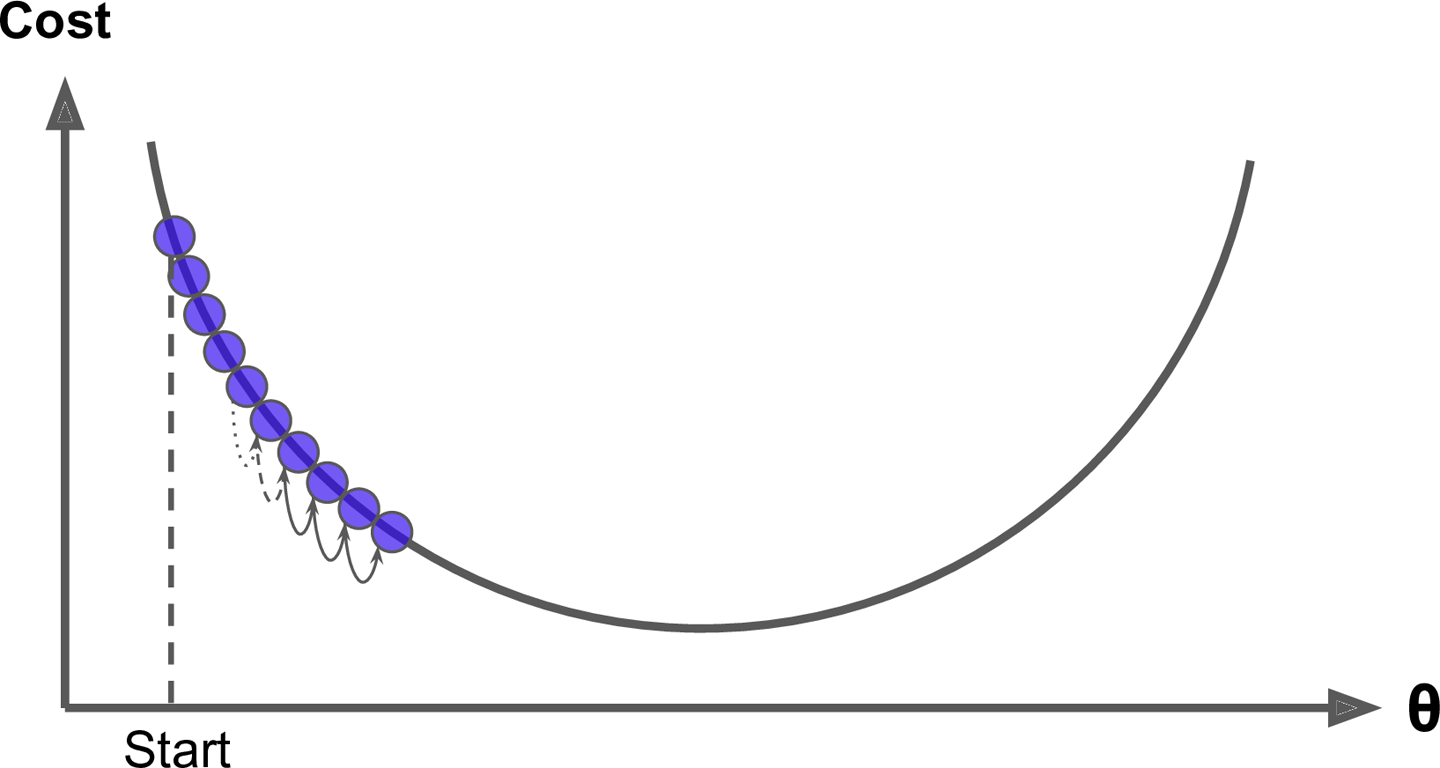

<img src="attachment:foo.png" width="200">

*학습률이 너무 큰 gradient descent*  
발산의 위험이있다.

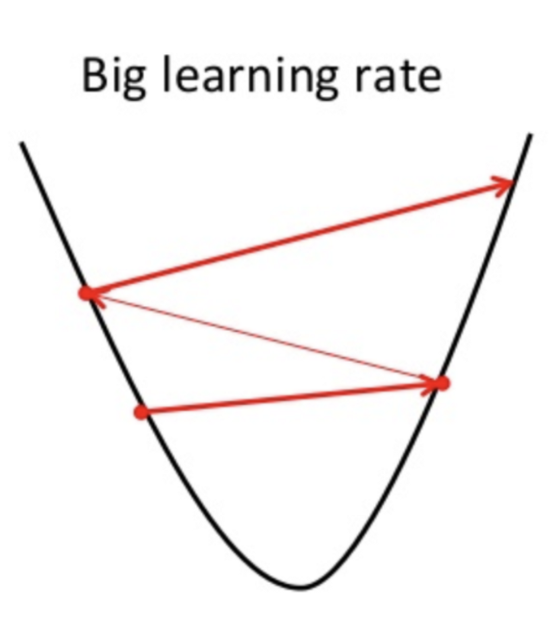

*실제 복잡한 gradient descent*  
값 초기화의 영향으로 local minimum에 빠질 우려가있다.

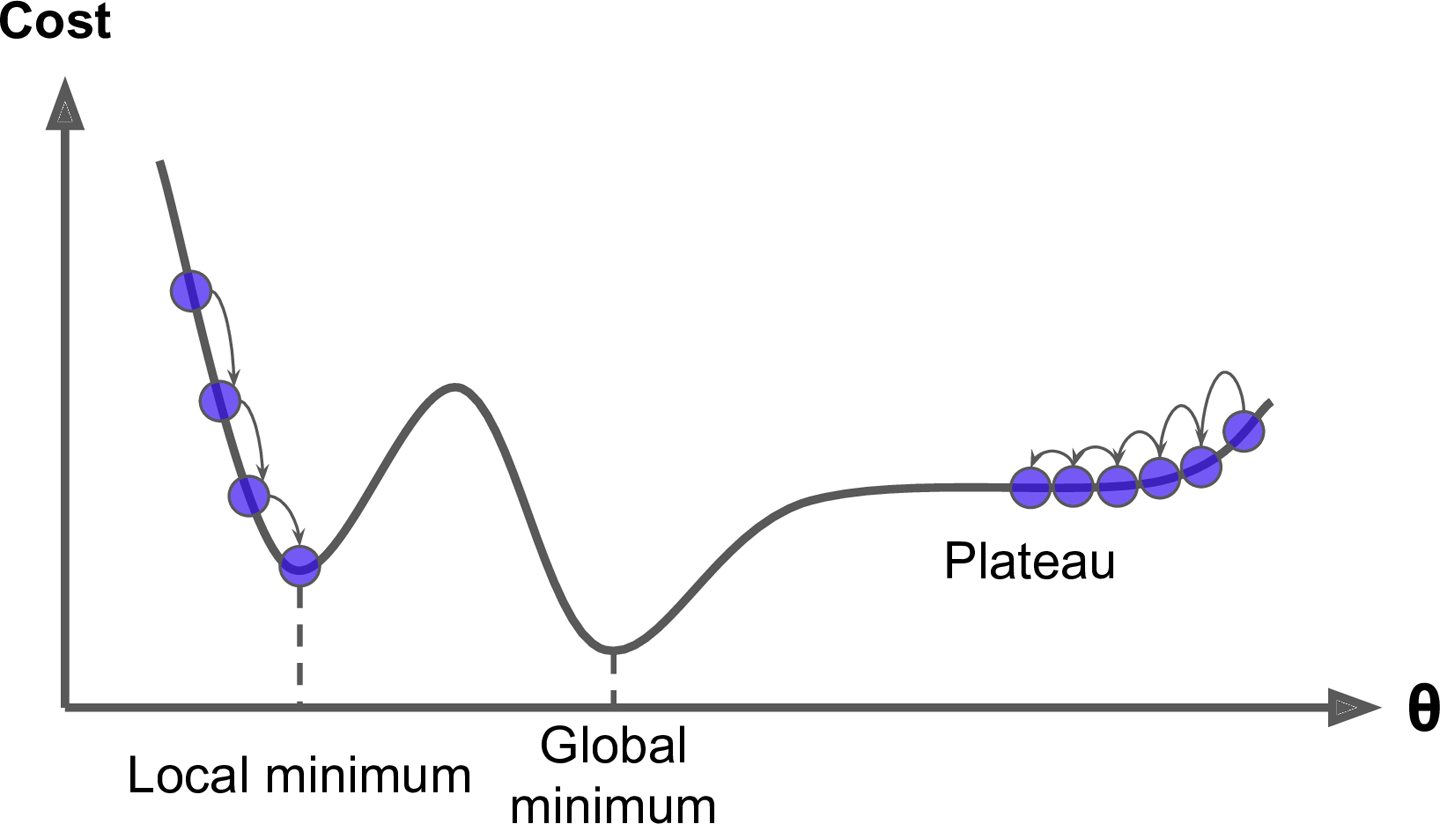

*특성 스케일에 따른 gradient descent*

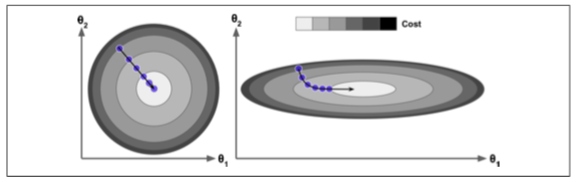

결국 모델훈련은 하파미터의 최솟값을 찾는 과정!

#### 4.2.1 배치 경사 하강법

편미분을 이용해서 모든 파라미터에 대해 편도함수를 구한다.

이 방법은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해서 계산한다.  
그래서 **배치 경사 하강법**이라고 한다.  
즉, 매 스텝에서 훈련 데이터 전체를 사용하기 때문에 매우 큰 훈련세트에서는 아주 느리다.  
대신에 경사 하강법은 특성수에 민감하지 않기 때문에  
수십만개의 특성에서 선형회귀를 훈련시키려면 정규방정식보다 경사하강법이 빠르다.

*경사하강법의 스텝*

$\theta^{next step} = \theta - \eta  d\theta MSE(\theta)$

*경사하강법의 구현*

In [43]:
eta = 0.1 # 학습률 (learning rate)
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [44]:
theta

array([[3.82817992],
       [3.10514909]])

In [45]:
theta_best

array([[3.82817992],
       [3.10514909]])

경사하강법으로 찾은 theta와 정규방정식으로 찾은 theta_best값이 정확히 일치!

**학습률에 따른 선형회귀에서의 gradient descent**

In [52]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration >0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize = 18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta = {}$".format(eta), fontsize = 18)

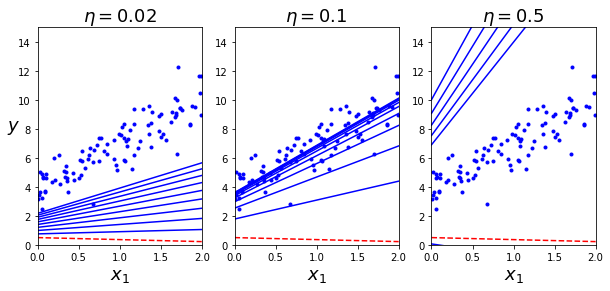

In [59]:
np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

plt.figure(figsize = (10,4))
plt.subplot(131); plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation =0, fontsize = 18)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta = 0.5)

plt.show()

* 학습률이 너무 낮으면 알고리즘은 최적점에 도달하겠지만 시간이 너무 오래걸린다.
* 가운데는 학습률이 적당해 보인다. 반복 몇번만에 최적점에 수렴했다.
* 오른쪽은 학습률이 너무 높다. 발산한다.

**반복횟수는 너무작으면 최적점 도달하기전에 알고리즘이 멈추고 너무 크면 모델 파라미터가 더이상 변하지 않는 동안 시간을 낭비하게 된다. 간단한 해결책은 반복 횟수를 아주 크게 지정하고 그래디언트 벡터가 아주 작아지면 ($\epsilon$ 보다 작아지면) 경사 하강법이 거의 최솟값이 도달한것이므로 알고리즘을 중지하는 것이다.**

#### 4.2.2 확률적 경사 하강법


배치 경사 하강법은 매 스텝에서 전체 훈련 세트를 사용해 그래디언트르 계싼해 훈련세트가 커지면 매우 느려진다  
이와는 반대로 **확률적 경사 하강법**은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산한다. 적은 데이터만 처리하기때문에 알고리즘이 훨씬 빠르고 큰 데이터를 다룰 수 있다.

반면 확률적이기때문에 알고리즘이 배치 경사 하강법보다 훨씬 불안정하다.  
비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지않고 요동침.

단, 비용함수가 불규칙적일겨우 알고리즘이 지역 최솟값을 건너 뛸수 있도록 도와주므로  
확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높다

무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서 좋지 않다.  
이 해결법은 학습률을 점진적으로 감소시키는 방법이있다.  
즉, 시작할떄는 학습률을 크게하고 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 하는것이다.  이를 **학습스케줄** 이라고 부른다.

#### 확률적 경사 하강법 구현

확률적 경사 하강법의 첫 20개 step

In [61]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

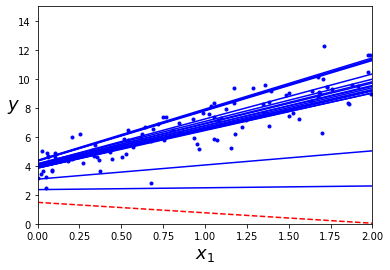

In [73]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터 learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                       
plt.show()               

In [74]:
theta

array([[3.83400723],
       [3.15512209]])

확률적 경사하강법은 sklearn에 SGDRegressor로 구현할 수 있다.

In [75]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=5, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [76]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.67306655]), array([3.12574379]))

#### 4.2.3 미니배치 경사 하강법

확률적 경사 하강법과 배치 경사 하강법 중간 어딘가에 있는 미니배치 경사 하강법,  
즉, 미니배치라 부르는 임의의 작은 샘플세트에 대해 그래디언트를 계산함.  
확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어 즉 GPU에서 얻는 성능 향상이다.

미니배치 크기를 어느정도 크게하면 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다. 하지만 지역 최솟값에 빠지게 될 염려는 SGD보다 더크다.

In [88]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [89]:
theta

array([[3.77216499],
       [3.0294868 ]])

In [90]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

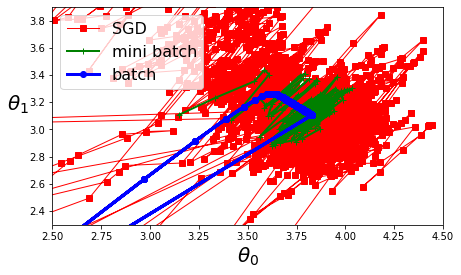

In [91]:

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="mini batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

정리하자면 선형회귀에서 최소값에 도달하는데 두가지 방법이 있다.  
해석적인 방법 -> 정규방정식  
알고리즘적인 방법 -> 경사하강법

- 정규방정식은 MSE를 최소로하는 가장 정확한 parameter를 구할 수 있으나, N(feature 개수)가 클때 연산량이 너무 많아지고 선형회귀 보다 복잡한 구조일 경우 사용할 수 없다.  
- 경사하강법은 정규방정식의 단점들을 보완해 줄 수 있다.
3가지의 방법론으로 나뉘는데
1. 배치 경사하강법 : 파라미터를 수렴시키는데 매 스텝마다 모든 데이터를 사용한다. 그러므로 M(data의 개수)가 클때 속도가 현저히 느려진다.
2. 확률적 경사하강법 : 파라미터를 수렴시킬때 랜덤한 하나의 샘플을 사용함으로써 배치 경사하강법의 속도 문제를 해결 할 수 있다. 또한 local minimum에 빠지는 현상을 방지할 수 있다. 대신 전체 데이터를 사용하는게 아니므로 수렴이 다소 불안정하다.
3. 미니배치 경사하강법 : 파라미터를 수렴시킬때 미니배치라는 단위크기의 샘플을 사용함으로써 배치 경사하강법과 확률적 경사하강법의 장단점을 보완한 알고리즘이다. 또한 GPU를 통한 행렬연산으로 굉장히 빠른 연산속도를 가질 수 있다.

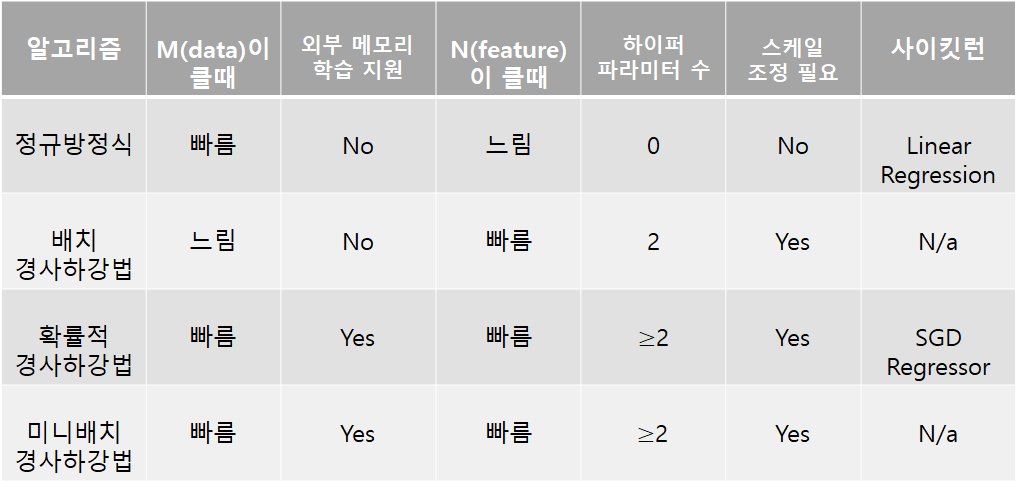

*각 알고리즘 구현이 중요한 것이 아니다. 실제로 sklearn에서도 확률적 경사하강법 이외에는 모듈에 추가하지도 않았다. 9장 부터 공부할 신경망에서 최적의 parameter를 찾는 수렴 과정을 이해하는데 이러한 개념들이 필요하다.*

### 4.3 다항회귀

실제 가지고있는 데이터가 단순한 직선보다 복잡한 형태라면..? -> **다항회귀**

아래는 약간의 노이즈를 포함하고 있는 2차 방정식 데이터

In [92]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X * 2 + np.random.randn(m,1)

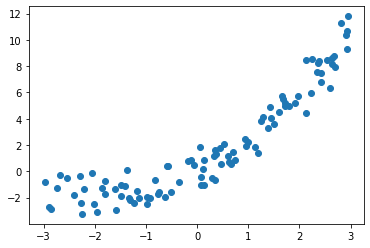

In [93]:
plt.scatter(X,y)

- [.] 뭔데이게
- [x] 뭔데그래